In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize
from pybaselines import Baseline

In [2]:
def peak(x, x0, s, A):
    law = stats.norm(loc=x0, scale=s)
    return A * law.pdf(x) / law.pdf(x0)

In [3]:
def model(x, x0, s0, A0, x1, s1, A1, x2, s2, A2):
    return peak(x, x0, s0, A0) + peak(x, x1, s1, A1) + peak(x, x2, s2, A2)

In [4]:
np.random.seed(12345)

In [10]:
x = np.linspace(0, 100, 500)
p = (50, 3, 250, 57, 2, 100, 68, 2.5, 150)
b = np.exp(0.035 * x) + 25.
s = 2 * np.ones_like(x)
n = s * np.random.normal(size=x.size)
y = model(x, *p) + b + n

In [11]:
fitter = Baseline(x_data=x)
background, parameters = fitter.arpls(y)
yb = y - background

In [12]:
popt, pcov = optimize.curve_fit(model, x, yb, p0=[45, 1, 200, 55, 1, 200, 65, 1, 200])
popt, pcov

(array([ 49.99868052,   2.98174254, 248.54153627,  56.95354381,
          1.98352143,  99.39712909,  67.99741874,   2.46905776,
        149.51680299]),
 array([[ 1.26804945e-04,  8.34661075e-05, -4.12126404e-04,
          1.74399117e-04, -1.44629747e-04, -2.99520284e-03,
         -3.15732714e-06,  6.60211324e-06, -1.56371529e-04],
        [ 8.34661075e-05,  1.22912636e-04, -2.23809943e-03,
          1.66312403e-04, -1.23350297e-04, -3.87281166e-03,
         -2.51861893e-06,  5.24277694e-06, -1.23897373e-04],
        [-4.12126404e-04, -2.23809943e-03,  2.20709001e-01,
         -8.20195037e-04, -2.95406832e-04,  7.52005423e-02,
         -1.83081319e-05,  4.00802021e-05, -9.70417503e-04],
        [ 1.74399117e-04,  1.66312403e-04, -8.20195037e-04,
          4.54707673e-04, -2.30938911e-04, -5.50483059e-03,
         -1.89735341e-06,  2.91569246e-06, -5.70258066e-05],
        [-1.44629747e-04, -1.23350297e-04, -2.95406832e-04,
         -2.30938911e-04,  3.60175861e-04, -9.38644923e-05,
    

In [13]:
yhat = model(x, *popt)

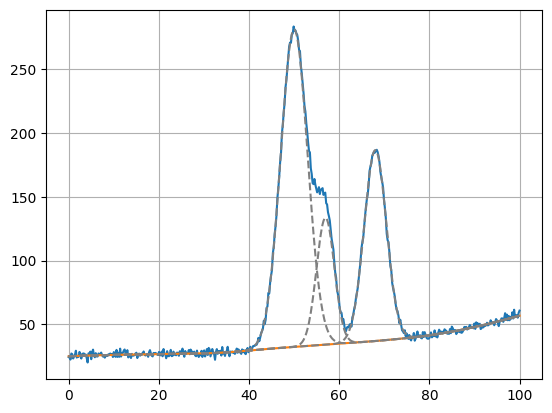

In [14]:
fig, axe = plt.subplots()
axe.plot(x, y)
axe.plot(x, background)
#axe.plot(x, background + yhat)
for i in range(3):
    axe.plot(x, background + peak(x, *popt[i*3:(i+1)*3]), "--", color="gray")
axe.grid()